<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports/-Data" data-toc-modified-id="Imports/-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports/ Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test</a></span></li></ul></div>

# Imports/ Data
- Small dataset : https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw/color

In [1]:
from fastai.vision import *

In [2]:
import os
os.environ['TORCH_HOME'] = '/media/subhaditya/DATA/COSMO/Datasets-Useful'

In [3]:
path = Path('data/')

In [4]:
get_transforms??

# Train

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

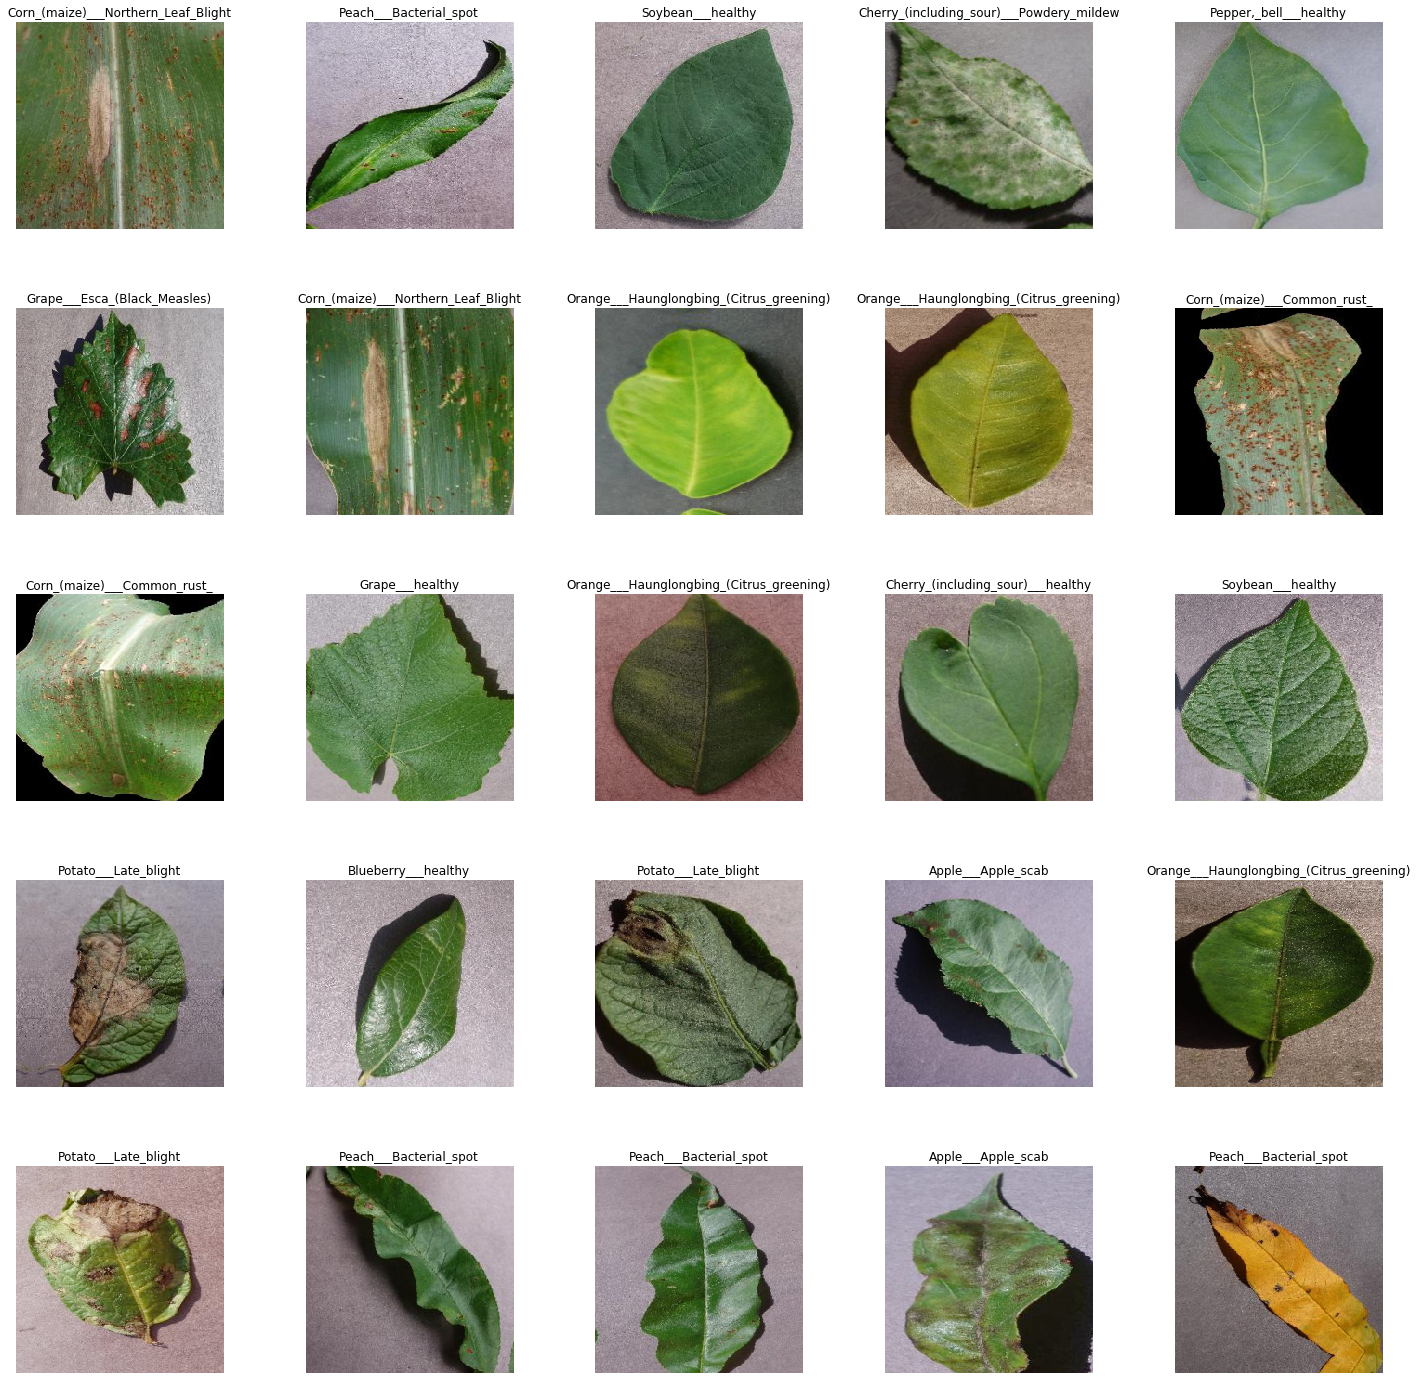

In [6]:
data.show_batch()

In [7]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

In [8]:
# learner.lr_find()

In [9]:
# learner.recorder.plot()

In [10]:
learner.fit_one_cycle(3, 2e-3)

In [11]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)


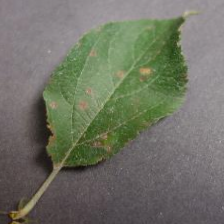

In [29]:
learner.data.train_ds[1100][0]

In [30]:
learner.data.train_ds[1100][1]

Category Apple___Cedar_apple_rust

# Test

In [31]:
img = learner.data.train_ds[1100][0]
learner.predict(img)

(Category Apple___Cedar_apple_rust,
 tensor(2),
 tensor([4.0846e-07, 1.0759e-06, 9.9999e-01, 2.9642e-11, 1.0691e-09, 1.4016e-06,
         3.5690e-10, 1.8837e-08, 1.8551e-09, 3.3922e-07, 3.9630e-12, 2.9998e-09,
         3.6555e-07, 4.1597e-08, 1.0674e-10, 1.6586e-10, 1.5778e-06, 4.0984e-10,
         3.2039e-10, 2.5401e-14, 2.1877e-10, 4.9590e-09, 1.9050e-11, 9.6823e-10,
         5.3353e-13]))

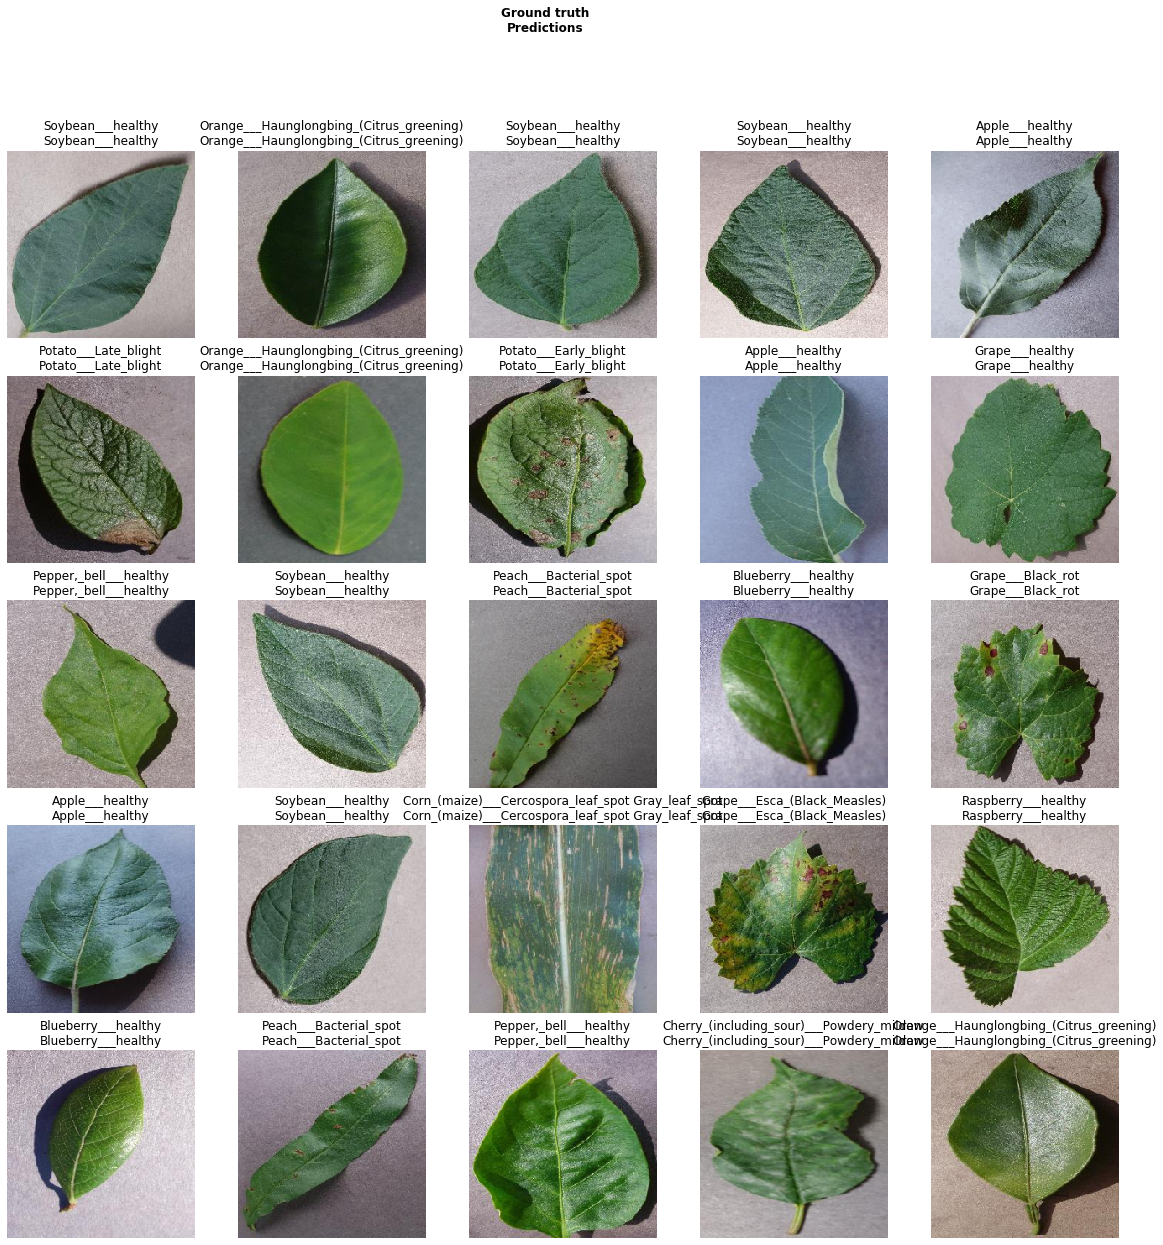

In [34]:
learner.show_results()